In [49]:
import torch  # type: ignore
from torch import nn # type: ignore
import numpy as np  # type: ignore
from pathlib import Path
import matplotlib.pyplot as plt # type: ignore

torch.__version__
device = "cuda" if torch.cuda.is_available else "cpu"
print(f"current device: {device}")

current device: cuda


In [53]:
# create known weights and bias
weight_1 = 0.9 
weight_2 = 0.2
bias = 0.3

# create a dataset
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [54]:
# create a target pattern 
y = weight_1 * X**2 + weight_2 * X + bias
y

tensor([[0.3000],
        [0.3044],
        [0.3094],
        [0.3152],
        [0.3218],
        [0.3290],
        [0.3370],
        [0.3456],
        [0.3550],
        [0.3652],
        [0.3760],
        [0.3876],
        [0.3998],
        [0.4128],
        [0.4266],
        [0.4410],
        [0.4562],
        [0.4720],
        [0.4886],
        [0.5060],
        [0.5240],
        [0.5428],
        [0.5622],
        [0.5824],
        [0.6034],
        [0.6250],
        [0.6474],
        [0.6704],
        [0.6942],
        [0.7188],
        [0.7440],
        [0.7700],
        [0.7966],
        [0.8240],
        [0.8522],
        [0.8810],
        [0.9106],
        [0.9408],
        [0.9718],
        [1.0036],
        [1.0360],
        [1.0692],
        [1.1030],
        [1.1376],
        [1.1730],
        [1.2090],
        [1.2458],
        [1.2832],
        [1.3214],
        [1.3604]])

In [55]:
# splitting data for training and testing
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [87]:
def plot_predictions(x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, predictions=None):
    # plotting for training data
    plt.scatter(x=x_train.cpu(), y=y_train.cpu(), s=4, c="b", label="training")
    # plottin for testing data
    plt.scatter(x=x_test.cpu(), y=y_test.cpu(), s=4, c="g", label="testing")

    if predictions is not None:
        plt.scatter(x=x_test.cpu(), y=predictions.cpu(), s=4, c="r", label="predictions")
    
    plt.legend(prop={"size": 10})

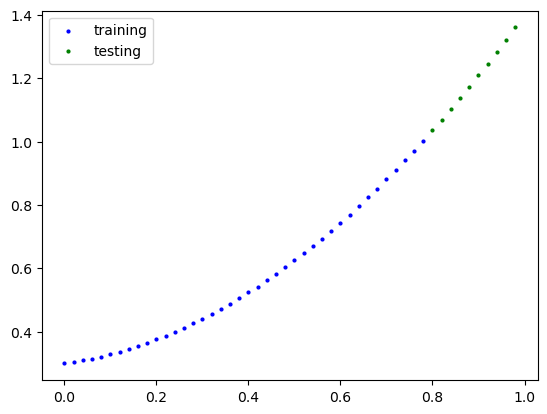

In [56]:
plot_predictions()

In [70]:
class QuadraticModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight_1 = nn.Parameter(data=torch.randn(1), requires_grad=True)
        self.weight_2 = nn.Parameter(data=torch.randn(1), requires_grad=True)
        self.bias = nn.Parameter(data=torch.randn(1), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight_1 * x**2 + self.weight_2 * x + self.bias

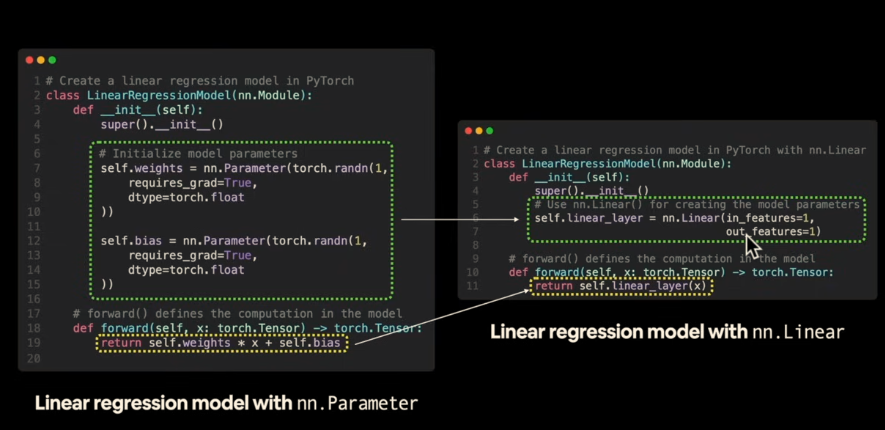

In [96]:
# initialize instance of QuadraticModel
torch.manual_seed(0)
model_0 = QuadraticModel()

model_0.state_dict(), model_0.parameters()

# initiate loss function and optimizer 
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.0001)

In [99]:
next(model_0.parameters()).device

device(type='cpu')

In [100]:
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [101]:
with torch.inference_mode():
    y_prev_preds = model_0(X_test)

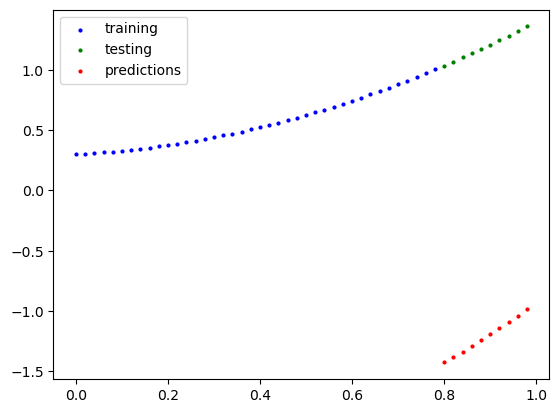

In [125]:
plot_predictions(predictions=y_prev_preds)

In [103]:
# train loop 
epochs = 500000
epochs_count = []
train_loss_values = []
test_loss_values = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # set the model to train mode
    model_0.train()

    # forward pass 
    y_preds = model_0(X_train)

    # determine loss/cost value 
    loss = loss_fn(y_preds, y_train)

    # optim.zero_grad()
    optimizer.zero_grad()

    # perform backpropagation
    loss.backward()

    # optimize using gradient descent
    optimizer.step()

    # set eval mode for testing
    model_0.eval()

    with torch.inference_mode():
        y_prediction_test = model_0(X_test)
        test_loss = loss_fn(y_prediction_test, y_test)
    if epoch % 100000 == 0:
        epochs_count.append(epoch.cpu())
        train_loss_values.append(loss.cpu())
        test_loss_values.append(test_loss.cpu())
        print(f"Epoch: {epoch} | MAE training loss: {loss} | MAE testing loss: {test_loss}")
        model_0.state_dict()

Epoch: 0 | MAE training loss: 2.5395660400390625 | MAE testing loss: 2.4079418182373047
Epoch: 100000 | MAE training loss: 0.014268330298364162 | MAE testing loss: 0.07151313126087189
Epoch: 200000 | MAE training loss: 0.004640698432922363 | MAE testing loss: 0.02095613442361355
Epoch: 300000 | MAE training loss: 8.065775182330981e-05 | MAE testing loss: 0.00019682645506691188
Epoch: 400000 | MAE training loss: 8.065775182330981e-05 | MAE testing loss: 0.00019682645506691188


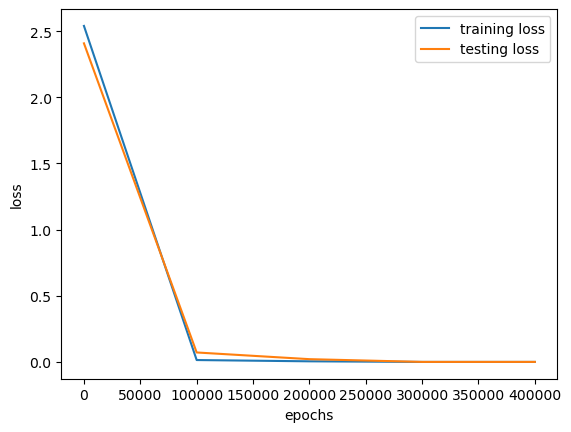

In [119]:
train_loss_values_cpu = [train.cpu() for train in train_loss_values]
test_loss_values_cpu = [test.cpu() for test in test_loss_values]

with torch.inference_mode():
    plt.plot(epochs_count, train_loss_values_cpu, label="training loss")
    plt.plot(epochs_count, test_loss_values_cpu, label="testing loss")
    plt.xlabel(xlabel="epochs")
    plt.ylabel(ylabel="loss")
    plt.legend()

In [120]:
with torch.inference_mode():
    y_new_preds = model_0(X_test)

model_0.state_dict()

OrderedDict([('weight_1', tensor([0.9007], device='cuda:0')),
             ('weight_2', tensor([0.1994], device='cuda:0')),
             ('bias', tensor([0.3000], device='cuda:0'))])

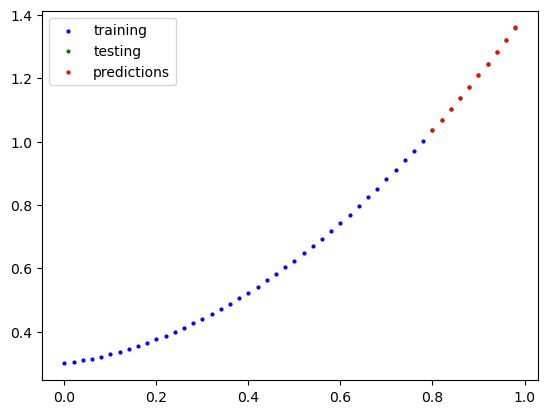

In [121]:
plot_predictions(predictions=y_new_preds)

In [122]:
# create a folder named models if it doesn't exist
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create saved model name + save model
MODEL_NAME = "01_pytorch_model_0.pth"
SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(), SAVE_PATH)

### LOAD MODEL FROM LOCAL

In [123]:
# create an instance of the model class 
loaded_model = QuadraticModel()
loaded_model.load_state_dict(torch.load(SAVE_PATH, weights_only=True))
loaded_model.state_dict()

OrderedDict([('weight_1', tensor([0.9007])),
             ('weight_2', tensor([0.1994])),
             ('bias', tensor([0.3000]))])

In [129]:
next(loaded_model.parameters()).device

device(type='cpu')

In [130]:
loaded_model.to(device)

QuadraticModel()

In [131]:
loaded_model.eval()
with torch.inference_mode():
    loaded_prediction = loaded_model(X_test)

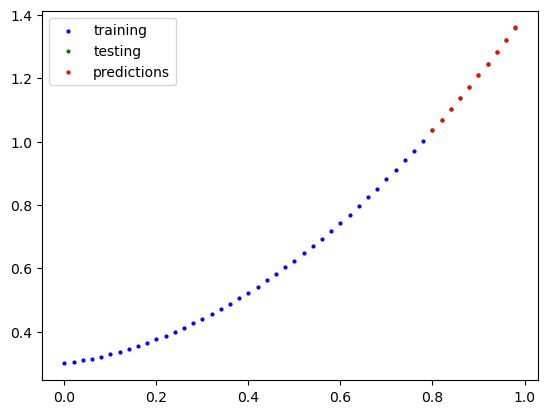

In [132]:
plot_predictions(predictions=loaded_prediction)